## Two Options for a Virtual Fishery
Similar to the models before with logistic and exponential growth, we provide you with two ways of exploring population dynamics in a virtual fishery.

You can use the following code, which constructs a simple fishery, simulating some of the data and decisions a fishery manager would have to think about. The harvest input parameter, H, has been set to 0 (but you can set H to anything you like to see what happens to the fish population). See the #comments to identify the other purposes of various parts in the code. 

This code simulates a very simplistic fishery. All the fish are in one place, and you can choose to harvest as many as you want.

Can you manage the fishery sustainably?

Imagine a fishery where the fish population grows logistically according to the equation:

$$
    \frac{dN}{dt} = rN(1-N/K)
$$

where:    
            
           N = number of fish

           t = time
           
           r = population growth rate
           
           K = carrying capacity

Now, we will introduce a harvest term, H, which is the number of fish humans remove from the population by fishing:

$$
\frac{dN}{dt} = rN(1-N/K) - H
$$


Managers are often tasked with choosing this "H" so that the fishery is sustainable -- that is, so that the number of fish does not change from year to year. With a bit of algebra or calculus, you can arrive at the correct choice for H, or you can play with the simulation below.


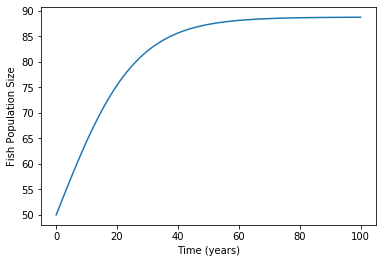

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Choose your parameters
r = 0.1     # Fish population growth rate
K = 100     # Fish carrying capacity
N0 = K/2    # Fish initial population size
t = 100     # We'll let this run for a long time to see how you did

H = 1  # Your choice of harvest rate

# Variables to hold data
time = np.linspace(0, t, t+1)
population = np.zeros_like(time)
harvest = np.zeros_like(time)

# Run the model
for i in range(len(time)):
    if i == 0:
        population[i] = N0
        harvest[i] = H
    else:
        population[i] = population[i-1] + (r*population[i-1]*(1-population[i-1]/K)-harvest[i-1])
        if population[i] > H:
            harvest[i] = H
        else:
            harvest[i] = population[i]

# Plot the results
plt.figure(2)
plt.plot(time, population)
plt.xlabel('Time (years)')
plt.ylabel('Fish Population Size')
plt.show()

# Explore: What happens if you "overfish" (i.e. H is too large)?
# What happens if your fish population is destabilized (i.e., somehow your initial population gets bumped below K/2)?
